https://www.freecodecamp.org/news/8-clustering-algorithms-in-machine-learning-that-all-data-scientists-should-know/

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [21]:

# Load data
data = pd.read_csv('./heart_disease_dataset.csv')

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(data)

In [49]:
kmn = KMeans(n_clusters=25,n_init='auto')
kmn.fit(data)
labels = kmn.predict(data)
labels

array([13,  5,  5, 13,  4, 23, 11, 12, 21,  3,  2, 12,  3, 23, 17,  8, 22,
        2,  4, 23, 13, 14, 21, 21,  5,  7, 15, 24, 23,  5, 15,  3, 16,  2,
       23, 23,  5,  5, 18, 17, 21,  8, 15, 17, 12, 21,  2, 21, 14, 13,  4,
        2, 16,  0, 18,  5, 16, 16, 13,  8,  9,  7,  5, 14, 18,  5, 21,  0,
       11,  1, 15,  3, 18, 21, 16, 12,  5, 12,  0,  5,  5,  7,  0,  3, 23,
        0,  0,  6,  4,  4, 21, 11,  2,  7, 15, 16,  5, 11,  8,  0,  0,  0,
       12, 14, 22, 23, 16, 21,  1, 16,  9,  3,  0,  3, 18,  8, 20,  4,  3,
       21,  3, 12,  2,  1, 20,  7, 11,  1, 23,  2, 13, 23,  0,  0,  7,  7,
       18, 21,  1, 20,  8, 19, 20, 18, 13, 16,  3, 23,  0, 15, 17,  7, 12,
        5,  5, 21, 16, 16, 21,  2, 20, 21,  7,  7, 20,  2, 10, 14, 16,  7,
       18,  5,  9, 12, 21, 18, 20,  5, 23, 20, 16, 12,  0, 24, 12, 15, 13,
       18, 19, 21, 23,  1, 10,  3,  7,  5, 20,  7,  4, 19,  4, 15, 17, 15,
       23,  5,  5,  5, 23,  9,  4, 22, 13,  3, 16, 13,  4,  7, 12,  0,  4,
        4,  4, 18,  9,  4

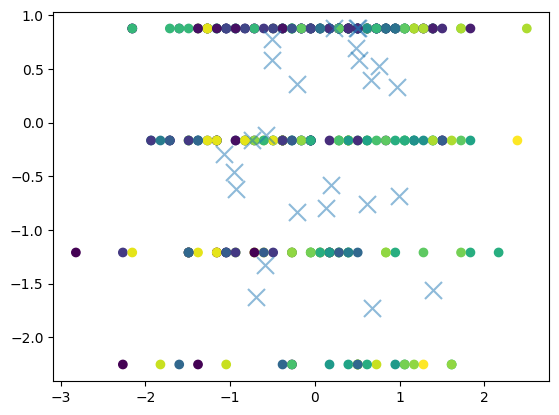

In [50]:
xs = data[:,0]
ys = data[:,2]
centroids = kmn.cluster_centers_
plt.scatter(xs, ys, c=labels)
plt.scatter(centroids[:,0],centroids[:,2],marker='x',s=150,alpha=0.5)
plt.show()

<h1>evaluation a clustering</h1>

<strong>inertia: </strong>distance from each sample to centroids of its cluster or how spread out the clusters. (Lower is better)

In [51]:
print(kmn.inertia_)


1501.569905241424


In [52]:
inertia_list = []
for k in np.arange(1, 50):
    kmn = KMeans(n_clusters=k,n_init='auto')
    kmn.fit(data)
    inertia_list.append(kmn.inertia_)
inertia_list

[4241.999999999998,
 3553.5335589090027,
 3311.2644354599506,
 3148.1958137243673,
 2702.5703858871548,
 2737.768575247487,
 2635.6962361278124,
 2341.3727955245295,
 2249.929024427762,
 2175.765580997287,
 2082.467014165366,
 2017.2746969466293,
 1992.7691601345753,
 1886.8153420682825,
 1868.5322884239713,
 1834.9374997065152,
 1781.2693889929428,
 1696.5492070051978,
 1720.885751515128,
 1706.8251511223787,
 1656.9224773953028,
 1586.127788022611,
 1539.3333134719774,
 1559.134500098296,
 1498.5818213143257,
 1441.941644115706,
 1433.9529284461296,
 1402.3375562518909,
 1405.9755864220222,
 1388.8230969954434,
 1364.8681959448295,
 1344.457357055739,
 1322.8979964707685,
 1268.7566335451609,
 1282.5721777132885,
 1294.341195256322,
 1257.117700712547,
 1225.2892569799915,
 1203.6458953911324,
 1184.1533454246976,
 1174.9223912066134,
 1148.9217216775269,
 1165.0357123019853,
 1112.2339976546823,
 1104.6226276212872,
 1112.108079979163,
 1063.2152220228545,
 1058.9010824416455,
 1024

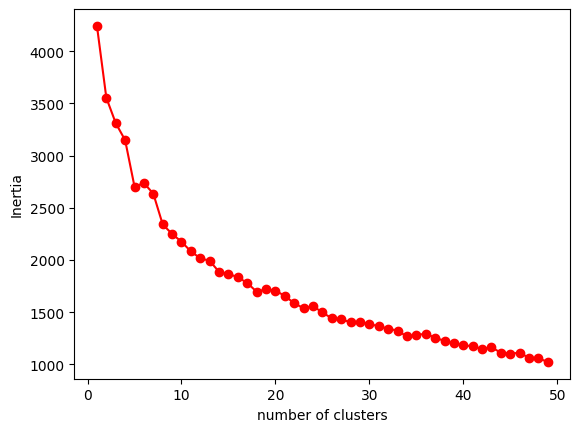

In [53]:
plt.plot(np.arange(1,50),inertia_list,'ro-')
plt.xlabel('number of clusters')
plt.ylabel('Inertia')
plt.show()

<h1>Hierarchical Clustering</h1>

[133  19  38 188 166 155 195  90 126 201 143  77  95 158 148 144 186 117
  73 155  92  82 125  14  38 176  72 189 117   7  67  52  55 143 104 117
   7  19  31  54 132 181  68 148  87 125 146 131  86 183 174 147 173 160
 106  37 169 172 123  93  25 122  38  85   9  39  15 128 199  16  68  53
  32 100 172  88  38  74 164  20 108  78 159 206 156 159 159   1  76  74
 124 194 143 177  76 106  98 195 155 114 114 163  76  60   9 156 107 127
  34  10 197  95 164 203  45 180 150 175  97 131  96 196 110 191 135  80
 207  34 158  62 123 111 163 116 179  77  27  43  21 184 105 141 152  35
 109 171  48 157 159  72 136 120 208  18  40  44 106 100 126  56 153 101
 176 120 152 104   3  84 112 178  29 102  17  89 131  33 154   8 118 150
 127 198 161 190  87  66 185  30 142 130 145 192   5  47  63  98 134 121
  70 139  75  91 149  69 145  18  38   8 155  17 174 182 167 204 171 165
 174 121  46 115 113  75 174  32  26 174 145  68   6  99  80 200  11  94
  66  37 202 173 179 158 158  70  73  58  61  41 17

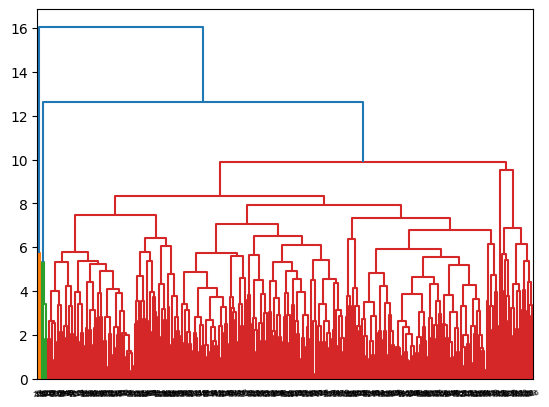

In [73]:
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster
import matplotlib.pyplot as plt
hir = linkage(data,method='complete')
labels = fcluster(hir, 2, criterion='distance')
print(labels)
dendrogram(hir,leaf_rotation=10)
plt.show()

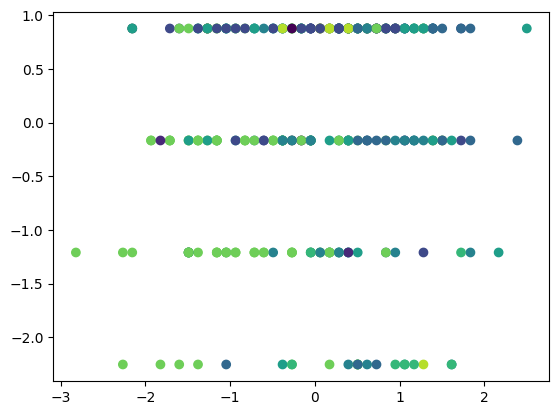

In [62]:
plt.scatter(data[:,0], data[:,2], c=labels)
plt.show()

In [65]:
inertia_list = []
for k in np.arange(1, 50):
    hir = linkage(data,method='complete')
    labels = fcluster(hir, k, criterion='distance')
    #kmn.fit(data)
    inertia_list.append(labels)
inertia_list

[array([182,  26,  53, 268, 236, 213, 275, 122, 170, 282, 192, 107, 127,
        219, 201, 195, 266, 156,  97, 211, 124, 113, 168,  19,  51, 253,
         95, 269, 157,   9,  86,  67,  70, 193, 139, 158,   9,  27,  41,
         69, 181, 261,  90, 202, 118, 169, 199, 180, 117, 263, 248, 200,
        246, 226, 142,  49, 240, 244, 165, 125,  34, 164,  51, 116,  12,
         54,  20, 174, 280,  21,  88,  68,  42, 134, 245, 120,  52, 101,
        233,  28, 146, 108, 224, 287, 215, 222, 223,   1, 104,  99, 167,
        274, 194, 254, 106, 143, 131, 276, 214, 153, 153, 231, 105,  76,
         13, 216, 145, 172,  45,  14, 278, 128, 234, 284,  60, 260, 204,
        252, 130, 178, 129, 277, 148, 271, 184, 110, 288,  46, 220,  78,
        166, 150, 232, 155, 256, 107,  36,  58,  29, 264, 141, 190, 207,
         47, 147, 243,  63, 217, 225,  96, 185, 161, 289,  24,  55,  59,
        144, 135, 171,  71, 209, 136, 253, 162, 208, 140,   3, 115, 151,
        255,  38, 137,  22, 121, 179,  44, 210,  10

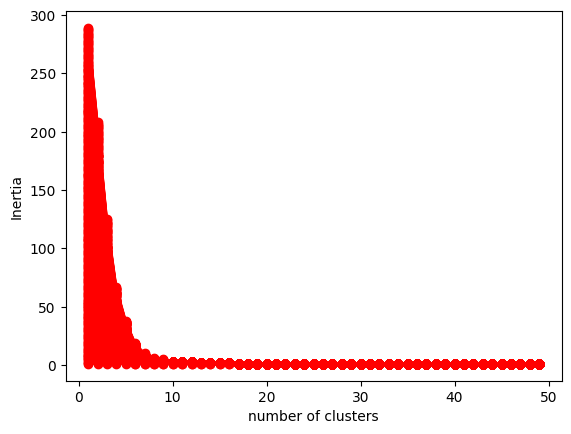

In [66]:
plt.plot(np.arange(1,50),inertia_list,'ro-')
plt.xlabel('number of clusters')
plt.ylabel('Inertia')
plt.show()

<h1>Meanshift</h1>

Number of estimated cluster: 5


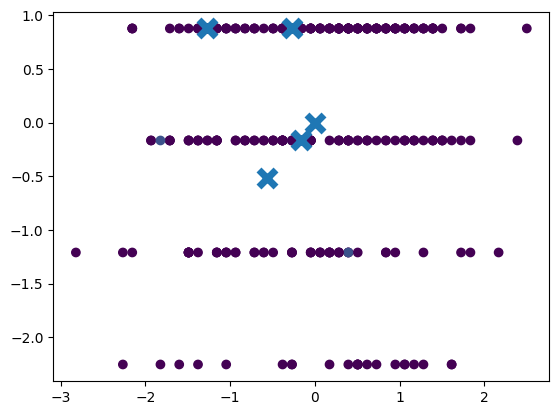

In [77]:
from sklearn.cluster import MeanShift
x = data
ms = MeanShift(bandwidth=5)
ms.fit(x)
labels = ms.labels_
cluster_center = ms.cluster_centers_
n_cluster = len(np.unique(labels))
print('Number of estimated cluster:' ,n_cluster)
plt.scatter(x[:,0], x[:,2], c=labels)
plt.scatter(cluster_center[:,0], cluster_center[:,2], marker='x', s=150, linewidth=5)
plt.show()

<h1>DBSCAN : Density-Based Spatial Clustering of Applications with
Noise</h1>

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1  1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1
  2  3 -1 -1 -1  4 -1 -1 -1 -1 -1 -1  4 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  5 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  2 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  6 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1  7  7 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  8  0 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1  9 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  3 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 10 -1 -1 -1 -1 -1 -1 11 -1  6 -1 -1 -1 -1 -1 -1 -1 12 -1
  5 10 -1 -1 -1 -1 -1 -1 -1 -1 11 -1 -1 -1 -1 -1 -1 -1 -1  6 -1 -1 -1  1
 -1 -1 -1 -1 -1 -1 12 -1 -1 -1 -1 -1 -1 -1 -1  8 -1 -1 -1 -1  8 -1 -1  9
 -1 13 -1 -1 -1 -1 -1 -1 13 -1 -1 -1 -1 -1 -1 -1 -1  9 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


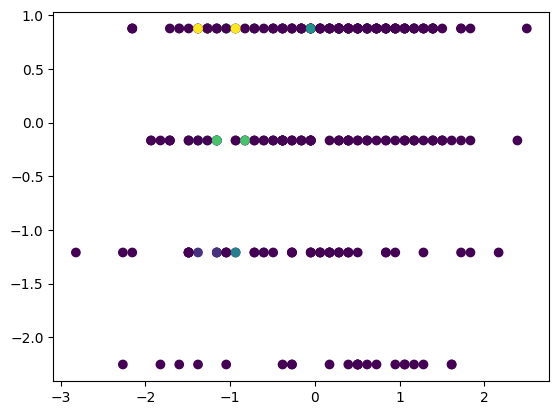

In [101]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1,min_samples=2)
dbscan.fit(data)
labels = dbscan.labels_
print(labels)
xx = data[:,0]
yy = data[:,2]
plt.scatter(xx,yy, c=labels)
plt.show()


In [95]:
inertia_list = []
for k in np.arange(1, 50):
    dbscan = DBSCAN(eps=0.1*k,min_samples=k)
    dbscan.fit(data)
    labels = dbscan.labels_
    inertia_list.append(labels)
inertia_list

[array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

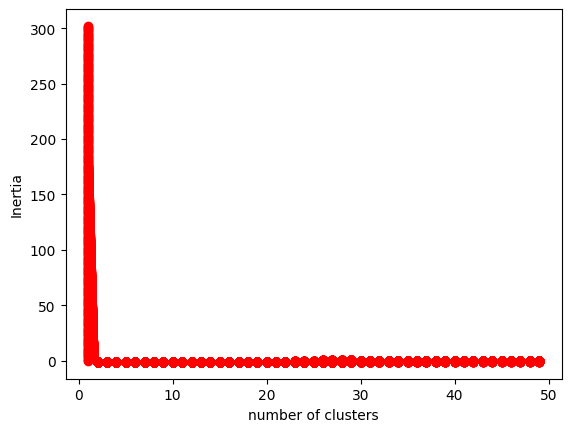

In [97]:
plt.plot(np.arange(1,50),inertia_list,'ro-')
plt.xlabel('number of clusters')
plt.ylabel('Inertia')
plt.show()